In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '32'
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import math
import sys
sys.path.append('../')
from pyfd3d import pyfd3d
from pyMKL import pardisoSolver
import pyfd3d.fd3d as fd3d
from scipy.sparse.linalg import qmr, bicgstab

In [9]:
Nz = 100
Npml = np.array([0,0,10])

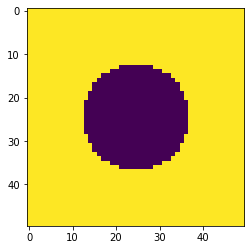

In [8]:
## specify slab plane
xrange = yrange = np.array([-0.5, 0.5])
radius = 0.25
Nx = Ny = 50

x = np.linspace(xrange[0], xrange[1], Nx)
y = np.linspace(yrange[0], yrange[1], Ny)

xx,yy = np.meshgrid(x,y)

slab_plane = 9*np.ones((Nx,Ny))

slab_plane[xx**2+yy**2<radius**2] = 1
plt.imshow(slab_plane)

In [10]:
## integrate slab structure into 3D grid
eps_r = np.ones((Nx,Ny,Nz))